In [1]:
library(glmnet)
library(Matrix)

Loading required package: Matrix
Loading required package: foreach
Loaded glmnet 2.0-5



## show that primal and augmented-data solutions are the same as matrix inversion

In [2]:
N <- 100
P <- 200

# crucial to scale X and y, otherwise solutions are different
X <- scale(matrix( rnorm(N*P,mean=0,sd=1), N, P))
nz_beta <- c(1,-2,3,-4,5,-6,7,-8,9,10); beta <- c(nz_beta,rep(0,P-length(nz_beta)))
sigma <- 0.1
y <- scale(X %*% beta + rnorm(N, mean=0, sd=sigma), scale = TRUE)

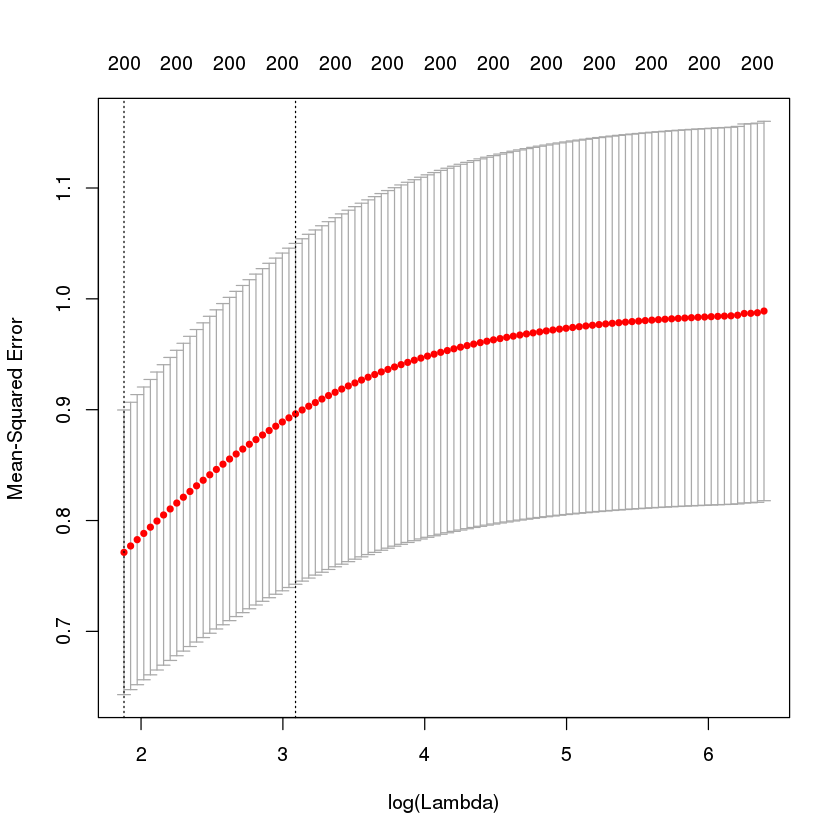

In [3]:
fit.natural.cv <- cv.glmnet(X, y, alpha=0.0, intercept=FALSE)
fit.natural.lambda <- fit.natural.cv$lambda.1se
fit.natural.coef <- (coef(fit.natural.cv, s=fit.natural.lambda))[-1]
plot(fit.natural.cv)

In [4]:
fit.natural.coef[1:10]

[1] -0.005956411 -0.004873940  0.006044647 -0.009453157  0.004056424
 [6] -0.012859825  0.011524319 -0.015803905  0.018066069  0.023969410

In [5]:
y_star <- c(y, rep(0,P))
X_star <- rbind(X, sqrt(N*fit.natural.lambda)*diag(P))

In [6]:
fit.artificial <- glmnet(X_star, y_star, alpha=0.0, lambda=0, intercept=FALSE)

In [7]:
beta_mm <- solve(t(X) %*% X + N*fit.natural.lambda*diag(P)) %*% t(X) %*% y

In [8]:
beta_mm_a <- solve(t(X_star) %*% X_star) %*% t(X_star) %*% y_star

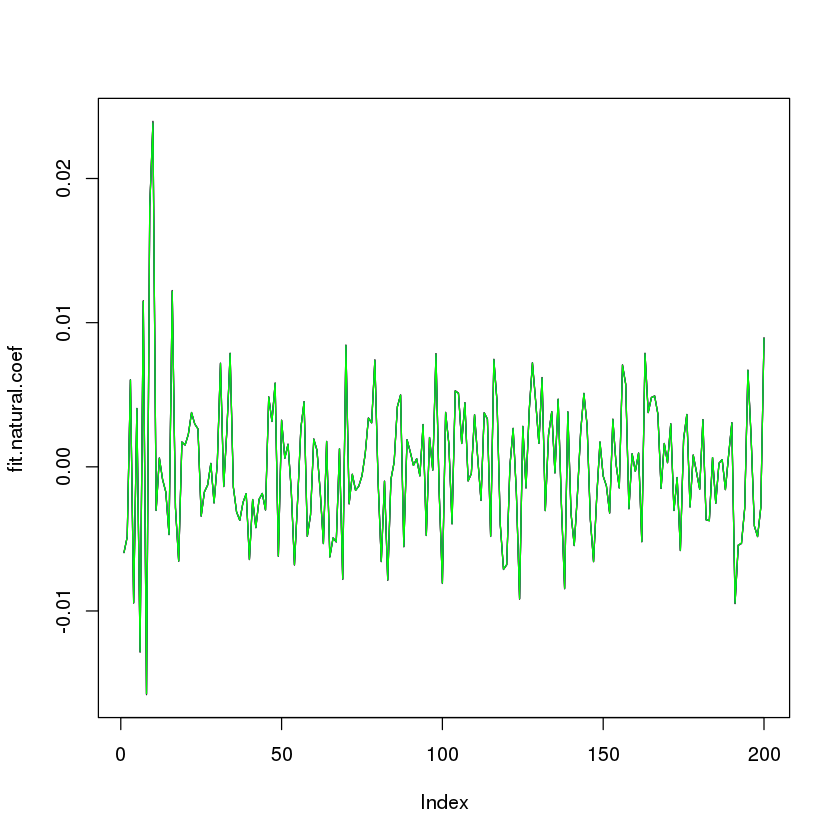

In [9]:
plot(fit.natural.coef, type="l", ylim = range(fit.natural.coef))
lines(fit.artificial$beta, col = "red")
lines(beta_mm, col = "blue")
lines(beta_mm_a, col = "green")

In [18]:
range(range(c(as.vector(fit.artificial$beta),fit.natural.coef)))
range(abs(fit.artificial$beta-fit.natural.coef))

[1] -0.01936848  0.02040271

[1] 2.789504e-09 8.506405e-05

In [19]:
(fit.natural.coef*(1+fit.natural.lambda))[1:10]

[1]  0.1022255 -0.1232618  0.1557984 -0.2757360  0.4160659 -0.3588504
 [7]  0.3315067 -0.3949752  0.3698704  0.3693444

In [20]:
## why are the betas so much smaller than they should be? -- standardization issue?

## compare elastic net via primal and augmented-data methods

In [10]:
N <- 100
P <- 200

# crucial to scale X and y, otherwise solutions are different
X <- scale(matrix( rnorm(N*P,mean=0,sd=1), N, P))
nz_beta <- c(1,-2,3,-4,5,-6,7,-8,9,10); beta <- c(nz_beta,rep(0,P-length(nz_beta)))
sigma <- 0.1
y <- scale(X %*% beta + rnorm(N, mean=0, sd=sigma), scale = TRUE)

In [15]:
alpha <- 0.75
lambda <- 0.35
lambda_1 <- alpha*lambda
lambda_2 <- (1-alpha)*lambda

In [12]:
fit.primal <- glmnet(X, y, alpha=alpha, lambda=lambda,
                     intercept=FALSE)

In [71]:
y_star <- c(y, rep(0,P))
X_star <- rbind(X, sqrt(N*lambda_2)*diag(P))/sqrt(1+lambda_2)

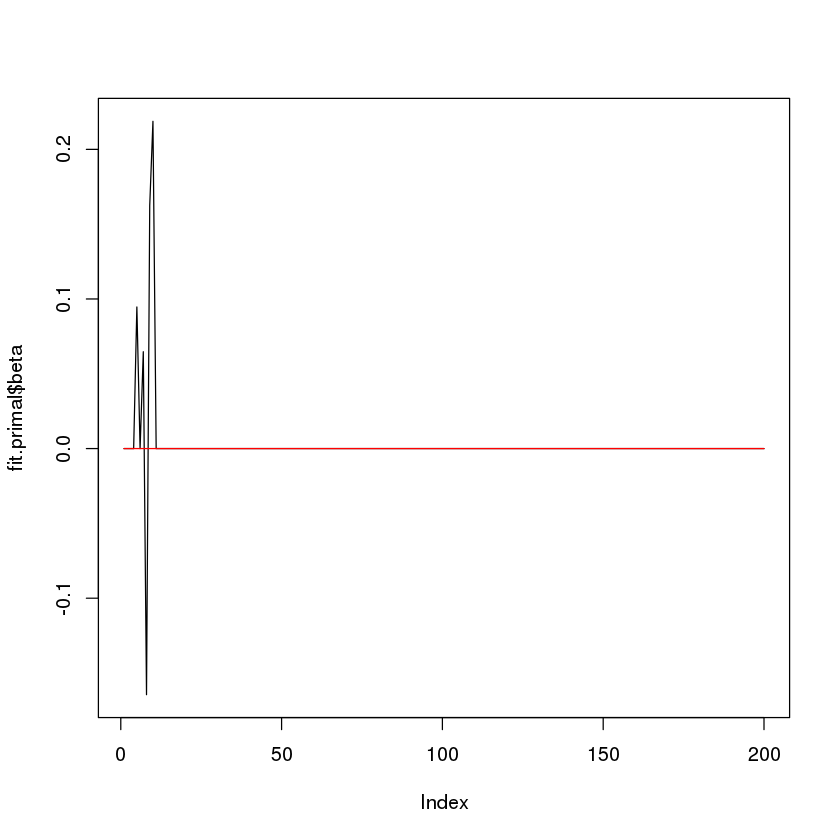

In [74]:
fit.augmented <- glmnet(X_star, y_star, alpha=1, lambda=lambda_1/sqrt(1+lambda_2),
                        intercept=FALSE, standardize=FALSE)

plot(fit.primal$beta, type="l", ylim = range(c(as.vector(fit.primal$beta), as.vector(fit.augmented$beta))))
lines(fit.augmented$beta/sqrt(1+lambda_2), col = "red")

In [62]:
sqrt(1+lambda_2)

[1] 1.042833